In [270]:
%matplotlib inline

# Package to filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data Loading and other standard packages
import sqlite3
import nltk
import string
import re
import pickle
import os
import time
import string
import pickle
import pandas as pd
import numpy as np
from scipy import interp
from tqdm import tqdm
from scipy.sparse import find
from wordcloud import WordCloud, STOPWORDS
from prettytable import PrettyTable
from sklearn.datasets import load_boston
from random import choice as ch

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing packages
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

# Packages related to text processing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn import decomposition
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Packages for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error

# Packages for crossvalidation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split

# Model packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDRegressor

In [271]:
# List for tabulaer data
pretty_table_header = ['SGD Type', 'Number of Iterations', 'Learning Rate','MSE']
pretty_table_list = []

### Define functions
* Scatter plot between actual and predicted output
* function to produce random number list
* SkLearn's SGDRegressor
* Manual SGD functio

In [272]:
#scatter plot
def plot_scatter(y_test,y_pred,title):
    plt.scatter(y_test,y_pred)
    plt.title(title)
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()

In [273]:
# Random number list
def create_random_list(size, k):
    random_list = []
    list_number = list(range(size))
    while len(random_list) != k:
        rand = ch(list_number)
        if rand not in random_list:
            random_list.append(rand)
    return random_list

In [274]:
# SGD Regressor from SKLEARN
def sklearn_sgd_function(X_train, y_train, X_test, y_test, n_iter, l_rate):
    clf = SGDRegressor(penalty=None, n_iter=n_iter, eta0=l_rate)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    return pred, mse, clf.coef_, clf.intercept_

In [275]:
# Manual SGD implementation
def manual_sgd_function(X_train, y_train, X_test, y_test, n_iter, l_rate):
    col = X_train.shape[1]
    k = 30
    w_next = np.zeros(shape=(1,col)) # Initialising weight vector to zeros
    b_next = 0                       # Initialising intercept to zero
    pow_t = 0.5
    t=1
    
    for iter_ in range(n_iter):
        w_0 = np.zeros(shape=(1,col))
        b_0 = 0
        
        w_prev = w_next
        b_prev = b_next
        
        rand_idx = create_random_list(X_train.shape[0], 30) #Here we are taking K as 30
        X_train_ = X_train[rand_idx]
        y_train_ = y_train[rand_idx]

        for i in list(range(k)):
            y_eval = np.dot(w_prev,X_train_[i])+b_prev
            w_0 += X_train_[i] * (y_train_[i] - y_eval)
            b_0 += (y_train_[i] - y_eval)
        
        w_0 *= (-2/X_train_.shape[0])
        b_0 *= (-2/X_train_.shape[0])
        
        w_next = w_prev - (l_rate*w_0)
        b_next = b_prev - (l_rate*b_0)
        l_rate = l_rate/pow(t, pow_t) #Same as sklearn to be in harmony with it
        
    # predicting the output
    pred = []
    for i in range(X_test.shape[0]):
        y_val = np.dot(w_next,X_test[i]) + b_next
        pred.append(y_val)
        
    # Get the MSE
    mse = mean_squared_error(y_test, pred)
    
    return pred, mse, w_next, b_next

### Load the data

In [276]:
# Loading the Boston Data
X = load_boston().data
Y = load_boston().target

### Split the data

In [277]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

### Standardization of data

In [278]:
# Scaling the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SKLearn SGD implementation with 100 iteration and learning rate as 1

In [279]:
y_test_data, mse_val, weights, intercept = sklearn_sgd_function(X_train, y_train, X_test, y_test, 100,1)
temp_list = ['SGDRegressor', '100', 1, round(mse_val,2)]
pretty_table_list.append(temp_list)

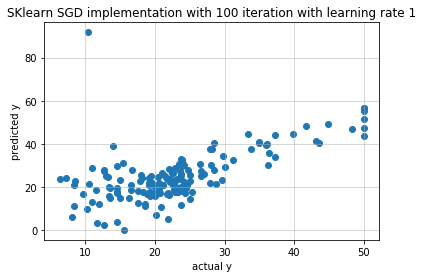

Mean Squared Error:  92.85800423542291


In [280]:
plot_scatter(y_test, y_test_data, 'SKlearn SGD implementation with 100 iteration with learning rate 1')
print("Mean Squared Error: ",mse_val)

### Manual SGD implementation with 100 iteration with learning rate 1

In [281]:
y_test_data, mse_val, weights, intercept = manual_sgd_function(X_train, y_train, X_test, y_test, 100,1)
temp_list = ['Manual SGD', '100', 1,round(mse_val,2)]
pretty_table_list.append(temp_list)

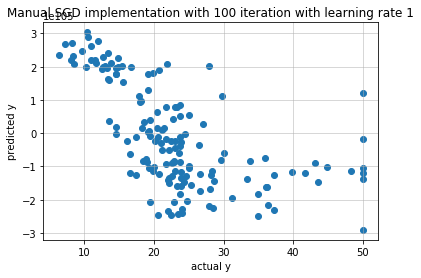

Mean Squared Error:  2.3513847176008e+210


In [282]:
plot_scatter(y_test, y_test_data, 'Manual SGD implementation with 100 iteration with learning rate 1')
print("Mean Squared Error: ",mse_val)

### SKLearn SGD implementation with 100 iteration and learning rate as 0.1

In [283]:
y_test_data, mse_val, weights, intercept = sklearn_sgd_function(X_train, y_train, X_test, y_test, 100,0.1)
temp_list = ['SGDRegressor', '100', 0.1, round(mse_val,2)]
pretty_table_list.append(temp_list)

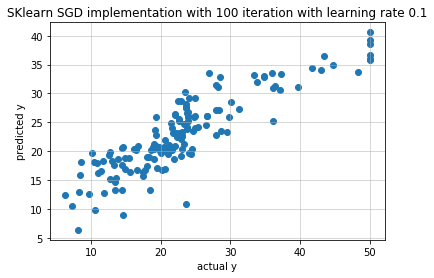

Mean Squared Error:  23.73385452650557


In [284]:
plot_scatter(y_test, y_test_data, 'SKlearn SGD implementation with 100 iteration with learning rate 0.1')
print("Mean Squared Error: ",mse_val)

### Manual SGD implementation with 100 iteration with learning rate 0.1

In [285]:
y_test_data, mse_val, weights, intercept = manual_sgd_function(X_train, y_train, X_test, y_test, 100,0.1)
temp_list = ['Manual SGD', '100', 0.1,round(mse_val,2)]
pretty_table_list.append(temp_list)

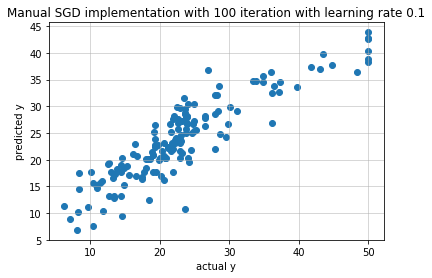

Mean Squared Error:  19.395513805991108


In [286]:
plot_scatter(y_test, y_test_data, 'Manual SGD implementation with 100 iteration with learning rate 0.1')
print("Mean Squared Error: ",mse_val)

### SKLearn SGD implementation with 100 iteration and learning rate as 0.01

In [287]:
y_test_data, mse_val, weights, intercept = sklearn_sgd_function(X_train, y_train, X_test, y_test, 100,0.01)
temp_list = ['SGDRegressor', '100', 0.01, round(mse_val,2)]
pretty_table_list.append(temp_list)

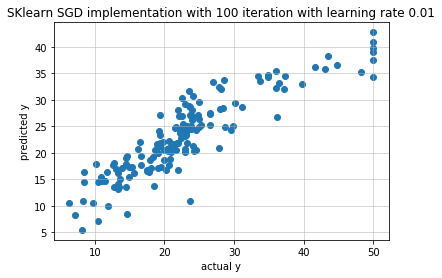

Mean Squared Error:  19.804017413955584


In [288]:
plot_scatter(y_test, y_test_data, 'SKlearn SGD implementation with 100 iteration with learning rate 0.01')
print("Mean Squared Error: ",mse_val)

### Manual SGD implementation with 100 iteration with learning rate 0.01

In [289]:
y_test_data, mse_val, weights, intercept = manual_sgd_function(X_train, y_train, X_test, y_test, 100,0.01)
temp_list = ['Manual SGD', '100', 0.01,round(mse_val,2)]
pretty_table_list.append(temp_list)

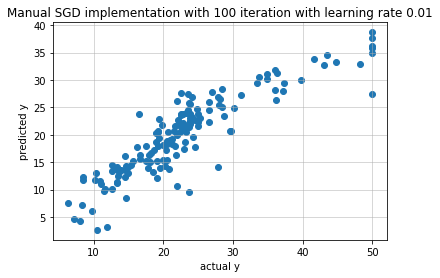

Mean Squared Error:  28.541139492366327


In [290]:
plot_scatter(y_test, y_test_data, 'Manual SGD implementation with 100 iteration with learning rate 0.01')
print("Mean Squared Error: ",mse_val)

### SKLearn SGD implementation with 100 iteration and learning rate as 0.001

In [291]:
y_test_data, mse_val, weights, intercept = sklearn_sgd_function(X_train, y_train, X_test, y_test, 100,0.001)
temp_list = ['SGDRegressor', '100', 0.001, round(mse_val,2)]
pretty_table_list.append(temp_list)

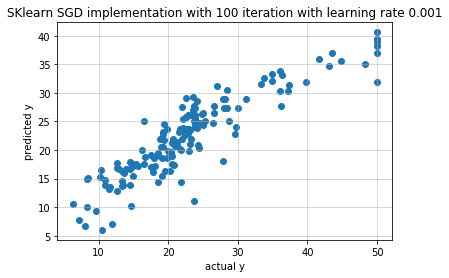

Mean Squared Error:  20.085902447110865


In [292]:
plot_scatter(y_test, y_test_data, 'SKlearn SGD implementation with 100 iteration with learning rate 0.001')
print("Mean Squared Error: ",mse_val)

### Manual SGD implementation with 100 iteration with learning rate 0.001

In [293]:
y_test_data, mse_val, weights, intercept = manual_sgd_function(X_train, y_train, X_test, y_test, 100,0.001)
temp_list = ['Manual SGD', '100', 0.001,round(mse_val,2)]
pretty_table_list.append(temp_list)

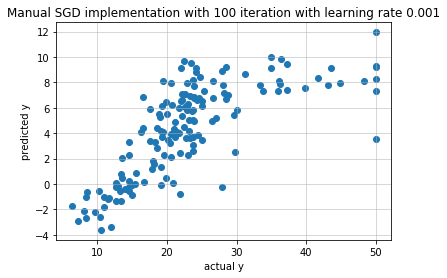

Mean Squared Error:  403.3855414839382


In [294]:
plot_scatter(y_test, y_test_data, 'Manual SGD implementation with 100 iteration with learning rate 0.001')
print("Mean Squared Error: ",mse_val)

## Conclusion

In [295]:
x = PrettyTable()

x.field_names = pretty_table_header

for row_ in pretty_table_list:
    x.add_row(row_)

print(x)

+--------------+----------------------+---------------+----------------------+
|   SGD Type   | Number of Iterations | Learning Rate |         MSE          |
+--------------+----------------------+---------------+----------------------+
| SGDRegressor |         100          |       1       |        92.86         |
|  Manual SGD  |         100          |       1       | 2.3513847176008e+210 |
| SGDRegressor |         100          |      0.1      |        23.73         |
|  Manual SGD  |         100          |      0.1      |         19.4         |
| SGDRegressor |         100          |      0.01     |         19.8         |
|  Manual SGD  |         100          |      0.01     |        28.54         |
| SGDRegressor |         100          |     0.001     |        20.09         |
|  Manual SGD  |         100          |     0.001     |        403.39        |
+--------------+----------------------+---------------+----------------------+


### Observations:
* We have sklearn's SGDRegressor and manual sgd regressor implemented here
* We didn't use any regularization term
* We have implemented the manual SGD so that the learning rate changes per iteration which will reduce the overshoot condition
* We have tested different values of learning rate among which the value of 0.1 gives a near result of SGDRegressor